### 학습목차

Dlib 얼굴인식의 문제점

Single Stage Object Detection

YOLO V1




---

#### Dlib 얼굴 인식의 문제점


- Face landmark

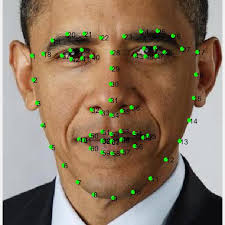

   - 얼굴을 잘 못 찾는다.

   - 동영상을 처리하기엔 너무 느리다.

   - 얼굴각도, 방향, 크기 등의 변화에 취약하다.
   
   
- Sliding window

   - 많은 시간 소요
   
   - 2-stage 방식의 detection
   
   - 연산의 병렬화 불가


---

#### Single Stage Object Detection

2-stage detector의 실행속도는 느리기에 이 모델보다 가벼운 1-stage기반 사용 하는 것이 좋다.


---

### YOLO

YOLO = You Only Look Once

#### YOLOv1

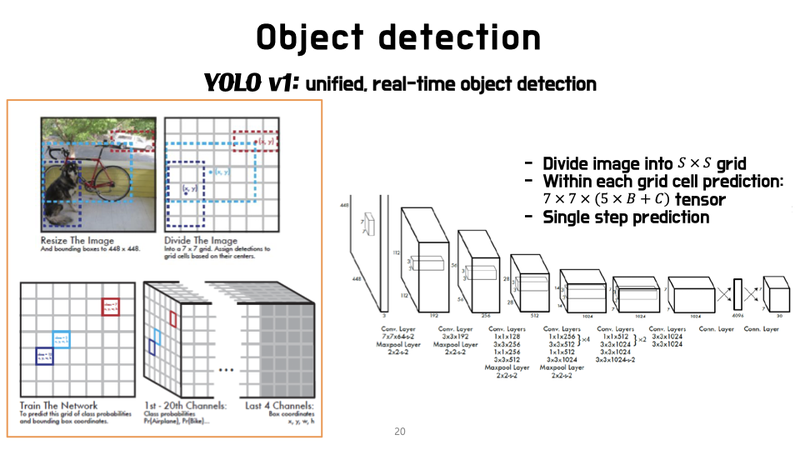


#### 동작 원리

#####  RCNN and YOLO

   - RCNN
   
   >물체 존재할 것 같은 곳을 backbone network로 표현(region proposal network)
   
   - YOLO v1
   
   >이미지 내의 작은 영역을 나누면 그곳에 물체가 있음(grid 내 물체 존재) 즉, grid는 고정하고, 각 grid 안에 물체가 있을 확률이 중요
   

<br>

- grid cell
  
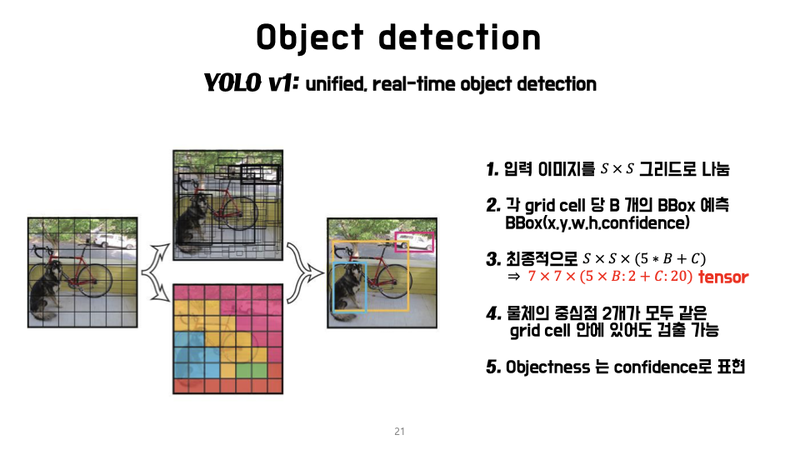


- bounding box(bbox) and confidence score of box예측한다

*confidence score는 bbox가 사물을 포함하는지에 대해 모델의 확신도이다*

*bbox

x,y,w,h,confidence, 총 5개의 예측을 하고 (x,y)좌표는 bbox중심좌표이고 w와 h는 너비와 높이이다.

<br>

- C개의 조건부 class확률 예측한다

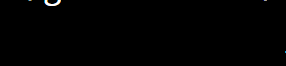

이 확률은 grid ceel이 사물을 포함한다는 조건을 갖는 확률로 bbox의 개수와 상관없이 각 grid  cell의 확률 예측한다. 마지막 layer에서 사용된다.

고로, 예측값: SxSx(B * 5 + C)

##### NMS

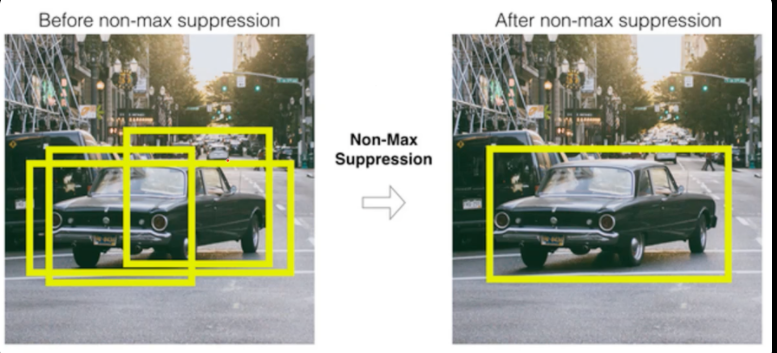

- 배경: 학습이 잘되어서 비슷한 크기의 bbox로 동일 물체를 잡을 시, bbox가 많아지는 단점 존재

- 등장: NMS

- 효과: 여러 bbox 중 가장 정확한 bbox선택기법, 중복제거

- 코드

def batch_iou(boxes, box):
  """Compute the Intersection-Over-Union of a batch of boxes with another
  box.
  Args:
    box1: 2D array of [cx, cy, width, height].
    box2: a single array of [cx, cy, width, height]
  Returns:
    ious: array of a float number in range [0, 1].
  """
  lr = np.maximum(
      np.minimum(boxes[:,0]+0.5*boxes[:,2], box[0]+0.5*box[2]) - \
      np.maximum(boxes[:,0]-0.5*boxes[:,2], box[0]-0.5*box[2]),
      0
  )
  tb = np.maximum(
      np.minimum(boxes[:,1]+0.5*boxes[:,3], box[1]+0.5*box[3]) - \
      np.maximum(boxes[:,1]-0.5*boxes[:,3], box[1]-0.5*box[3]),
      0
  )
  inter = lr*tb
  union = boxes[:,2]*boxes[:,3] + box[2]*box[3] - inter
  return inter/union

##### IoU

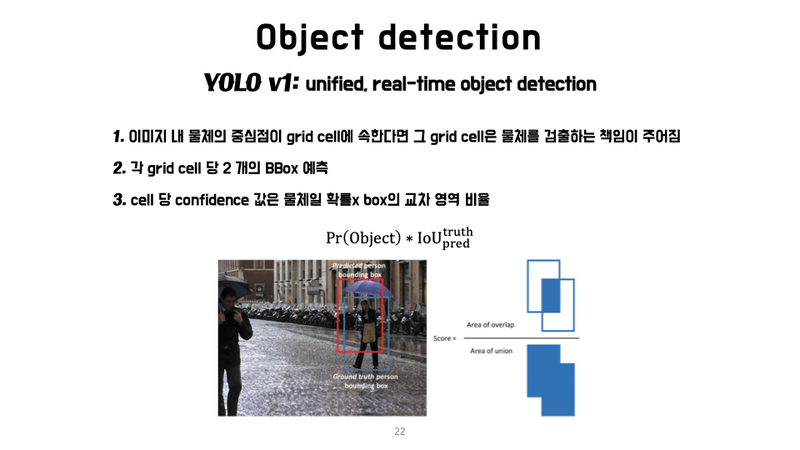

bbox의 목표인 groud truth와 최대한 동일하게 학습하기 위해서 IoU사용한다

- 코드

def batch_iou(boxes, box):
  """Compute the Intersection-Over-Union of a batch of boxes with another
  box.
  Args:
    box1: 2D array of [cx, cy, width, height].
    box2: a single array of [cx, cy, width, height]
  Returns:
    ious: array of a float number in range [0, 1].
  """
  lr = np.maximum(
      np.minimum(boxes[:,0]+0.5*boxes[:,2], box[0]+0.5*box[2]) - \
      np.maximum(boxes[:,0]-0.5*boxes[:,2], box[0]-0.5*box[2]),
      0
  )
  tb = np.maximum(
      np.minimum(boxes[:,1]+0.5*boxes[:,3], box[1]+0.5*box[3]) - \
      np.maximum(boxes[:,1]-0.5*boxes[:,3], box[1]-0.5*box[3]),
      0
  )
  inter = lr*tb
  union = boxes[:,2]*boxes[:,3] + box[2]*box[3] - inter
  return inter/union

##### YOLO의 특징

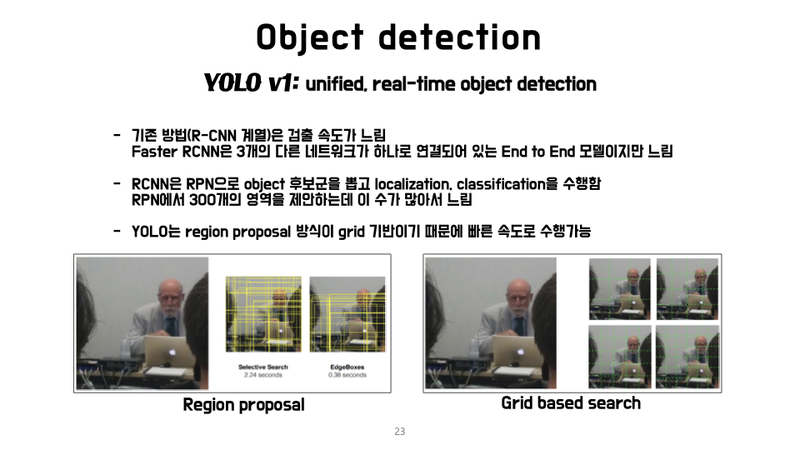

- 이미지를 S x S개의 grid로 나누기

- bbox의 좌표와 confidence score예측/ 1 grid

- 결과: real-time object detector

##### Inference 과정

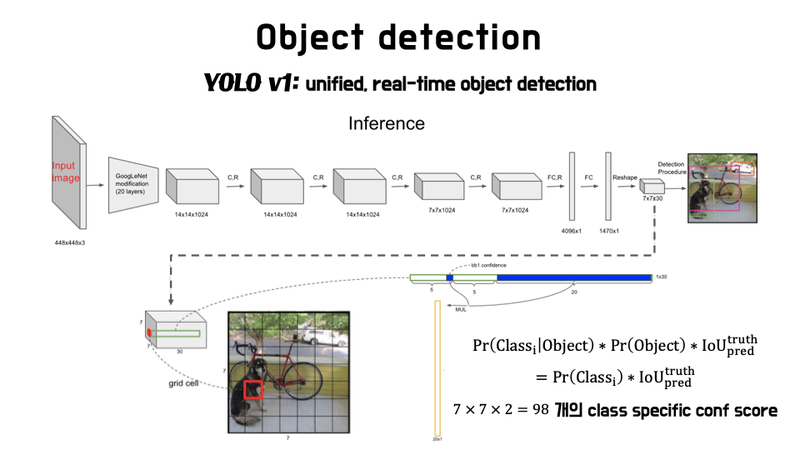

- 조건부 C의 Class구하기

- box의 confidence prediction과 곱하기

- class- specific confidenc score얻음

- 이 score이 예측된 box가 실제 사물과 잘 일치하는 지 알려줌

- NMS수행

- class and bbox location of object 결정 가능

#### 성능

##### loss함수

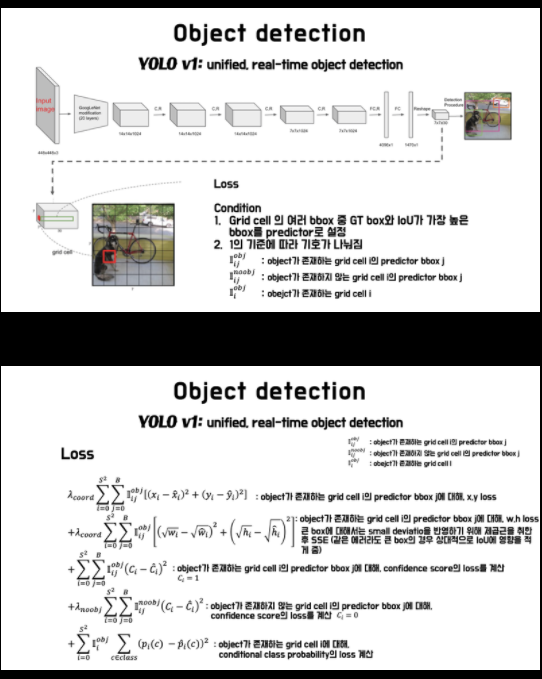

##### 성능

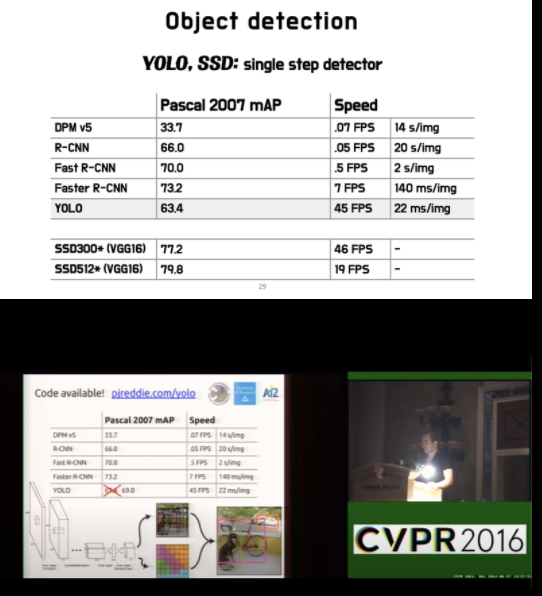




